## Handwritten Digits Recognition Model

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [2]:
# outputting the picture value as a series of numbers
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


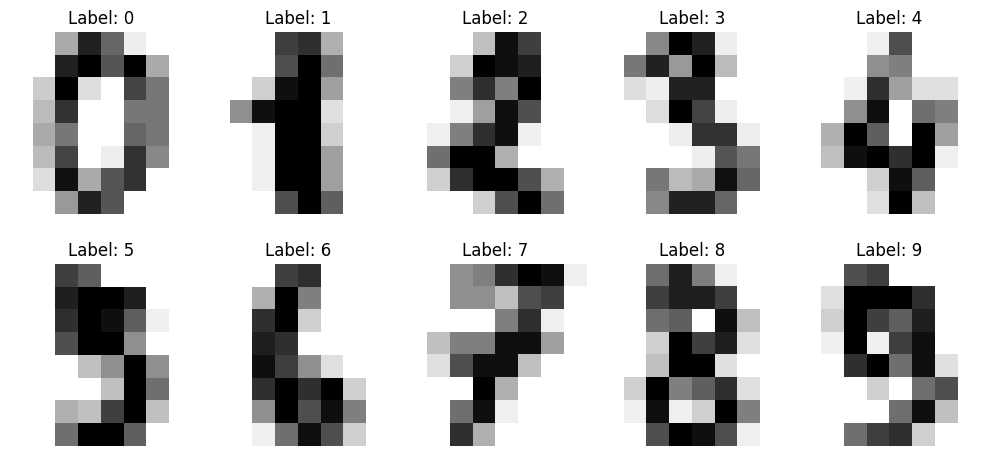

In [39]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()


In [40]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [41]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),     # two hidden layers (deeper net)
    activation='relu',               # faster, better for deep nets
    solver='adam',                   # adaptive optimizer
    max_iter=300,                    # more time to converge
    alpha=1e-4,                      # L2 regularization
    learning_rate_init=0.001,
    random_state=1,
    verbose=True                     # print training log
)

mlp.fit(x_train, y_train)

Iteration 1, loss = 7.42015233
Iteration 2, loss = 3.27252028
Iteration 3, loss = 2.01876414
Iteration 4, loss = 1.40408472
Iteration 5, loss = 1.03607446
Iteration 6, loss = 0.82932274
Iteration 7, loss = 0.68175682
Iteration 8, loss = 0.57438394
Iteration 9, loss = 0.50066362
Iteration 10, loss = 0.43664803
Iteration 11, loss = 0.38413749
Iteration 12, loss = 0.33966862
Iteration 13, loss = 0.29973586
Iteration 14, loss = 0.27035213
Iteration 15, loss = 0.24449289
Iteration 16, loss = 0.22092747
Iteration 17, loss = 0.20033217
Iteration 18, loss = 0.18259539
Iteration 19, loss = 0.16673902
Iteration 20, loss = 0.15464855
Iteration 21, loss = 0.14411296
Iteration 22, loss = 0.13409975
Iteration 23, loss = 0.12022021
Iteration 24, loss = 0.11330503
Iteration 25, loss = 0.10509889
Iteration 26, loss = 0.09796423
Iteration 27, loss = 0.09160185
Iteration 28, loss = 0.08521561
Iteration 29, loss = 0.07919946
Iteration 30, loss = 0.07287936
Iteration 31, loss = 0.06845762
Iteration 32, los

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,1


In [42]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.94      0.94      0.94        36
           2       0.92      1.00      0.96        35
           3       1.00      0.97      0.99        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.95      0.97      0.96        36
           7       1.00      0.94      0.97        36
           8       0.89      0.91      0.90        35
           9       0.97      0.94      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



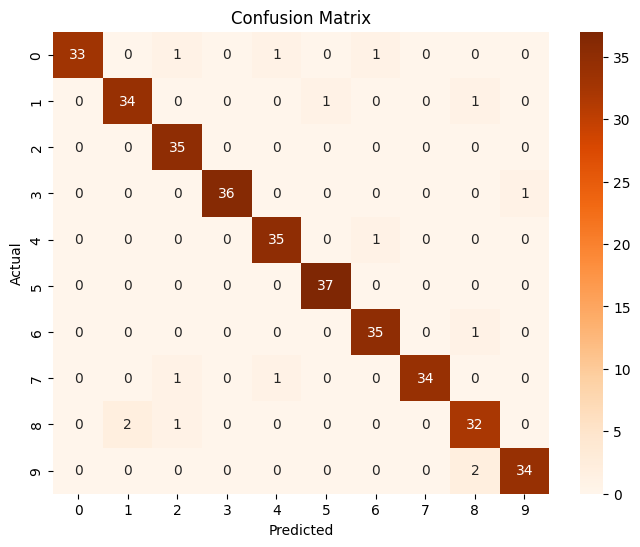

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

y_pred = mlp.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

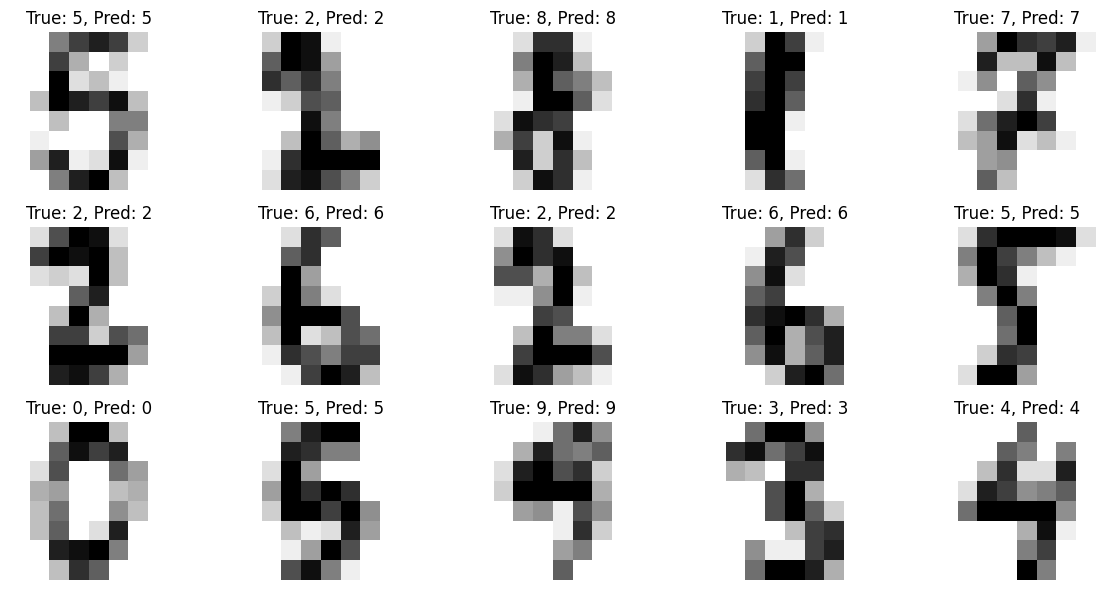

In [49]:
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(8, 8), cmap='binary')
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()

In [52]:
from sklearn.model_selection import GridSearchCV

params = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(MLPClassifier(max_iter=300), params, cv=3, n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_ * 100, "%")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'solver': 'adam'}
Best Score: 97.77313848295059 %


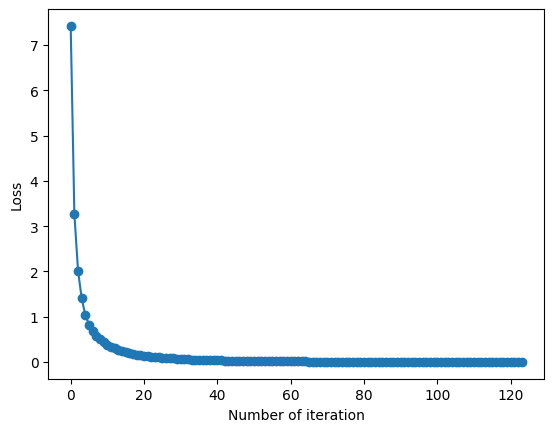

In [53]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("Number of iteration")
axes.set_ylabel("Loss")
plt.show()

In [24]:
predictions = mlp.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [25]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [26]:
# importing the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score

# calculating the accuracy with y_test and predictions
accuracy_score(y_test, predictions)

0.9146800501882058

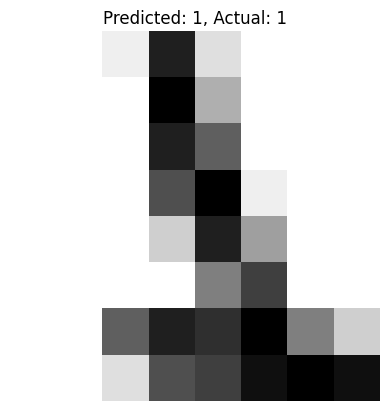

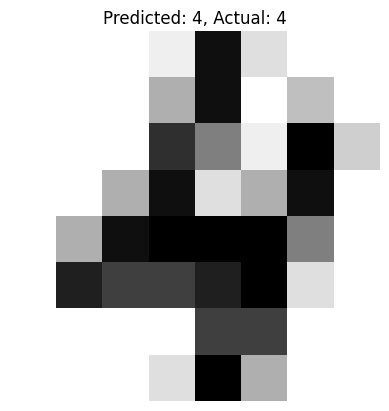

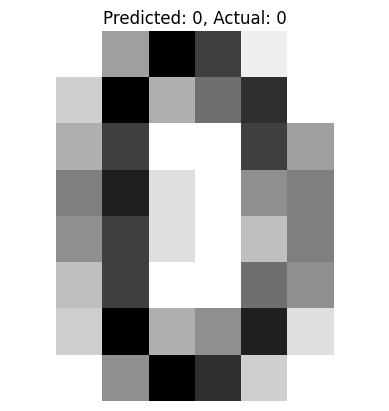

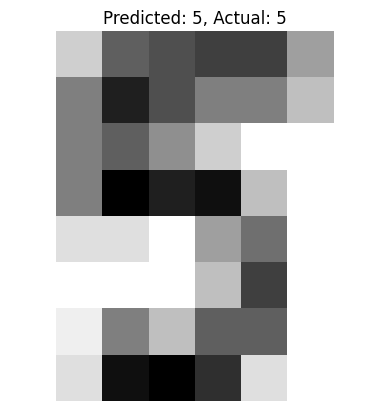

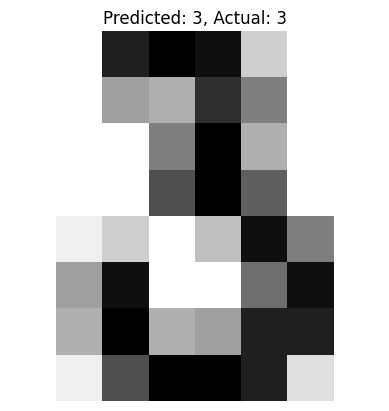

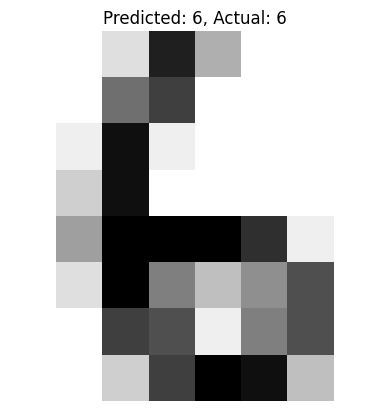

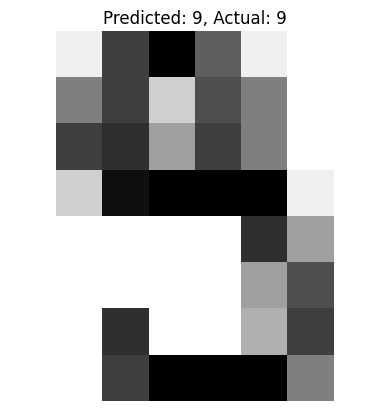

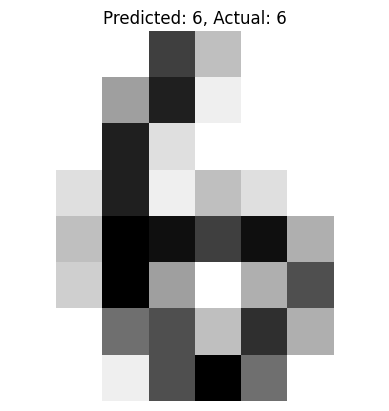

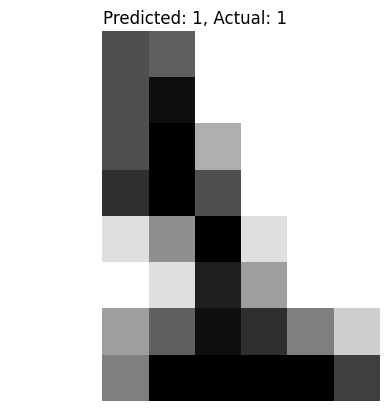

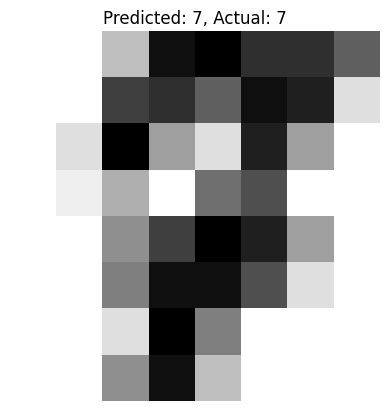

In [37]:
for i in range(10):
    plt.imshow(x_test[i].reshape(8,8), cmap='binary')
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()
